# Pymaceuticals Inc.
---

### Analysis

- Using the tumor data on the mice we are able to find a few correlations and make a few assumptions. First, Capomulin and Ramicane had by the lowest means and standard deviations(dispersion) which would indicate that tumor volumes with these two drugs either slowed significantly or reduced in size compared to the other drugs. We also plotted tumor volume on an individual mouse taking Capomulin and indeed showed a tumor size reduction. We also looked at correlations between the weight of the mice and tumor volume and found a direct correlation because as the tumor volume increased, the weight of the mice increased at the same rate. In conclusion, we find that Capomulin is the most beneficial drug regimen for reducing tumor size in mice.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")
# Display the data table for preview
merge_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
# Checking the number of mice.
len(merge_data["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_id = merge_data[merge_data.duplicated()]["Mouse ID"].values
dupe_id

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_data = merge_data.loc[merge_data["Mouse ID"].isin(dupe_id)]
dupe_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merge_data.drop_duplicates(subset="Mouse ID")
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_t = merge_data[["Drug Regimen", "Tumor Volume (mm3)"]].rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"}).groupby("Drug Regimen").mean()
median_t = merge_data[["Drug Regimen", "Tumor Volume (mm3)"]].rename(columns={"Tumor Volume (mm3)": "Median Tumor Volume"}).groupby("Drug Regimen").median()
var_t = merge_data[["Drug Regimen", "Tumor Volume (mm3)"]].rename(columns={"Tumor Volume (mm3)": "Tumor Volume Variance"}).groupby("Drug Regimen").var()
std_t = merge_data[["Drug Regimen", "Tumor Volume (mm3)"]].rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Dev."}).groupby("Drug Regimen").std()
stde_t = merge_data[["Drug Regimen", "Tumor Volume (mm3)"]].rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Err."}).groupby("Drug Regimen").sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_volume_df = mean_t.join(median_t).join(var_t).join(std_t).join(stde_t)
drug_volume_df.head(10)



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
agg_data = merge_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":
    [pd.NamedAgg(column="mean", aggfunc="mean"), 
    pd.NamedAgg(column="median", aggfunc="median"), 
    pd.NamedAgg(column="var", aggfunc="var"), 
    pd.NamedAgg(column="std", aggfunc="std"), 
    pd.NamedAgg(column="sem", aggfunc="sem")]})

agg_data

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

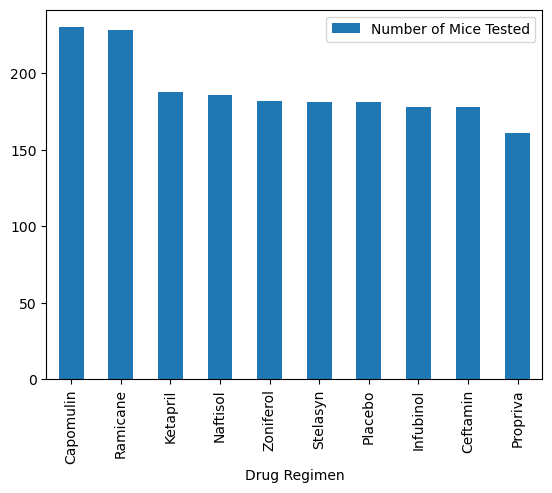

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug = merge_data["Drug Regimen"].value_counts()
drug_df = drug.to_frame(name="Number of Mice Tested")
drug_df.index.name = "Drug Regimen"
drug_df=drug_df.reset_index()
p_bar = drug_df.plot.bar(x="Drug Regimen", y="Number of Mice Tested")



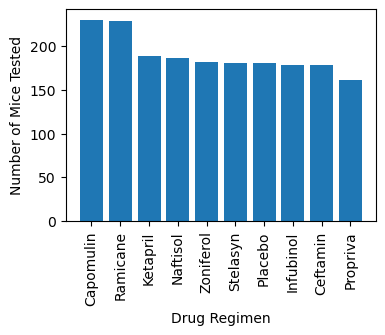

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.figure(figsize=(4, 2.75))
plt.bar(drug_df['Drug Regimen'], drug_df['Number of Mice Tested'], align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:ylabel='Percentage of Sex'>

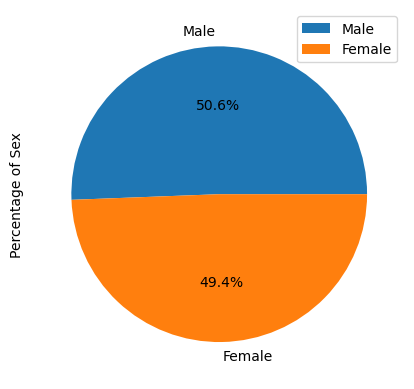

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# I used merge_data instead of clean data here as it would be more accurate in regards 
# to the mice that were tested for each drug (since some mice were tested multiple times)
total = len(merge_data["Sex"])
male_num = len(merge_data["Sex"][merge_data["Sex"] == "Male"])
female_num = len(merge_data["Sex"][merge_data["Sex"] == "Female"])

sex_df = pd.DataFrame({"Sex": ["Male", "Female"], "Percentage of Sex": [male_num/total, female_num/total]})
sex_df = sex_df.set_index("Sex")
sex_df.plot.pie(y="Percentage of Sex", autopct="%1.1f%%")


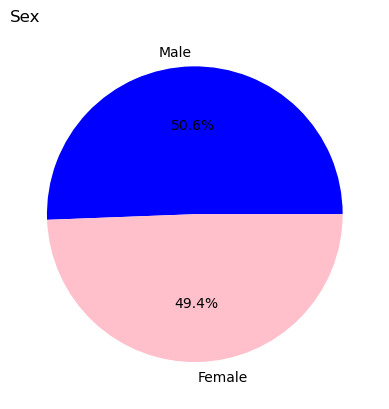

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# I used the merge data instead of the clean data here again
labels = ["Male", "Female"]
percent = [male_num/total, female_num/total]
colors = ["blue", "pink"]
explode = [0, 0]

plt.pie(percent, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Sex", loc='left')
plt.show()

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  get max tumor volume***groupby merge
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
ftvol_df = merge_data[merge_data["Drug Regimen"].isin(treatments)]
ftvol_df = ftvol_df.sort_values("Timepoint")
ftvol_df = ftvol_df.groupby(["Mouse ID", "Drug Regimen"]).max("Timepoint")
ftvol_df



,,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,Drug Regimen,,,,,
a203,Infubinol,45,67.973419,2,20,23
a251,Infubinol,45,65.525743,1,21,25
a275,Ceftamin,45,62.999356,3,20,28
a411,Ramicane,45,45.466677,1,3,22
a444,Ramicane,45,45.000000,0,10,25
...,...,...,...,...,...,...
y769,Ceftamin,45,68.594745,4,6,27
y793,Capomulin,45,45.000000,2,17,17
y865,Ceftamin,45,64.729837,3,23,26


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"] 

# Create empty list to fill with tumor vol data (for plotting)
out_df = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = ftvol_df.quantile([.25,.5,.75])
uq = quartiles["Tumor Volume (mm3)"][.75]
lq = quartiles["Tumor Volume (mm3)"][.25]
iqr = uq-lq

    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
l_bound = lq - (1.5*iqr)
u_bound = uq + (1.5*iqr)
drug_outliers = ftvol_df.loc[(ftvol_df["Tumor Volume (mm3)"] < l_bound) | (ftvol_df["Tumor Volume (mm3)"] > u_bound)]
   

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


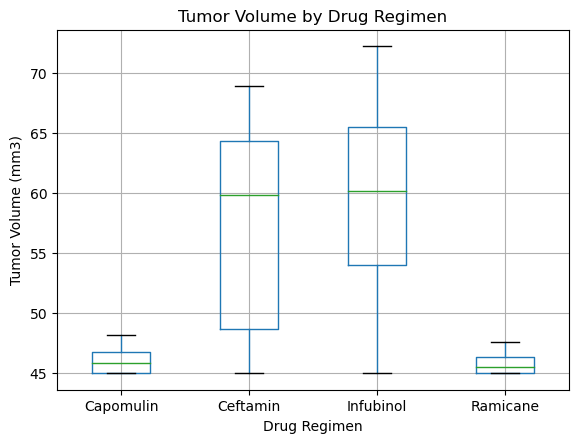

In [27]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

ftvol_df.reset_index(inplace=True)

ftvol_df.boxplot(column=["Tumor Volume (mm3)"], by=["Drug Regimen"])
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.title("Tumor Volume by Drug Regimen")
plt.suptitle('')
plt.show()


## Line and Scatter Plots

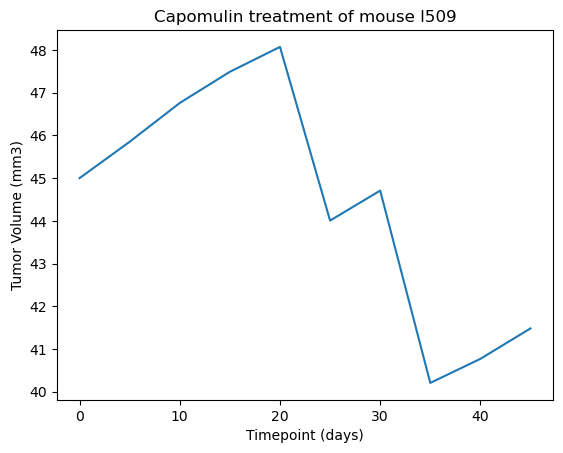

In [31]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
ybase = merge_data[merge_data["Drug Regimen"].isin(["Capomulin"])]
ybase1 = ybase[ybase["Mouse ID"].isin(["l509"])]
ybase1 = ybase1[["Tumor Volume (mm3)", "Timepoint"]]
y1 = ybase1["Tumor Volume (mm3)"]
x1 = ybase1["Timepoint"]

plt.plot(x1, y1)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

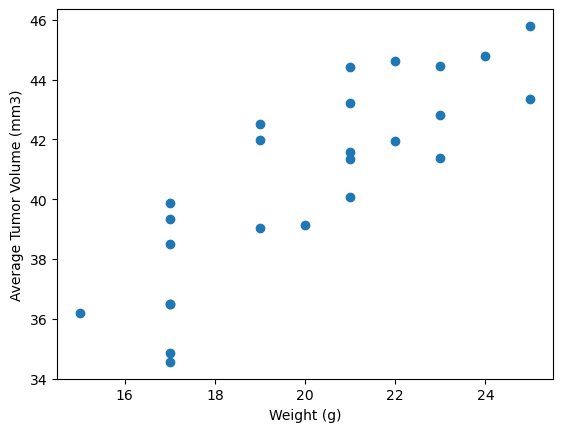

In [179]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
ybase2 = ybase[["Tumor Volume (mm3)", "Weight (g)", "Mouse ID"]]
ybase2 = ybase2.groupby("Mouse ID").mean("Tumor Volume (mm3)")
ybase2
y1 = ybase2["Tumor Volume (mm3)"]
x1 = ybase2["Weight (g)"]

plt.scatter(x1,y1)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


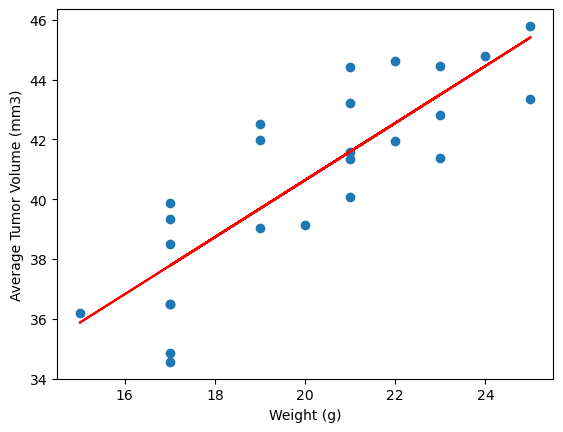

In [181]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1, y1)
regress_values = x1 * slope + intercept

plt.scatter(x1,y1)
plt.plot(x1, regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is: {round(rvalue, ndigits=2)}")
plt.show()
